# Main Document

## EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [132]:
crash_df = pd.read_csv('Traffic_Crashes_-_Crashes_20250403.csv')

In [117]:
crash_df.head(3)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,019d84ab0f03ace0b07075b0a7d83ba867b7dadad30410...,Y,03/29/2025 06:10:00 PM,35,STOP SIGN/FLASHER,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/29/2025 06:13:00 PM,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,2922,W,55TH ST,923.0,N,Y,NaN,NaN,NaN,NaN,2,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,4.0,0.0,18,7,3,41.793739,-87.697311,POINT (-87.697311324011 41.793738897511)
1,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,01/15/2025 01:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,Y,NaN,"OVER $1,500",01/15/2025 01:52:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,1234,W,43RD ST,924.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493)
2,00c996c2b04c2d3b5a5fc96d35b2b538e2c0f34703b885...,NaN,07/15/2023 11:00:00 PM,15,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO SIDE,PARKING LOT,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NaN,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,NaN,"OVER $1,500",07/16/2023 12:30:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,1932,E,75TH ST,333.0,NaN,NaN,NaN,NaN,NaN,NaN,2,"REPORTED, NOT EVIDENT",2.0,0.0,0.0,0.0,2.0,2.0,0.0,23,7,7,41.758974,-87.577299,POINT (-87.577299189217 41.758973539258)


In [129]:
crash_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [119]:
crash_df['FIRST_CRASH_TYPE'].unique()

array(['ANGLE', 'FIXED OBJECT', 'REAR TO SIDE', 'TURNING',
       'PARKED MOTOR VEHICLE', 'PEDALCYCLIST', 'REAR TO FRONT',
       'SIDESWIPE OPPOSITE DIRECTION', 'REAR END',
       'SIDESWIPE SAME DIRECTION', 'OTHER OBJECT', 'HEAD ON',
       'OTHER NONCOLLISION', 'PEDESTRIAN', 'REAR TO REAR', 'ANIMAL',
       'OVERTURNED', 'TRAIN'], dtype=object)

In [ ]:
# columns_to_remove = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I' ,
#                      'PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE','STREET_NO','STREET_DIRECTION', 'STREET_NAME','BEAT_OF_OCCURRENCE',
#                        'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I', 'DOORING_I','WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I','INJURIES_INCAPACITATING',
#                        'INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','INJURIES_NON_INCAPACITATING','NUM_UNITS']

In [133]:
# Datarame containing only Pedestraian& Pedalcyclist accidents
ped_df = crash_df[(crash_df['FIRST_CRASH_TYPE'] == 'PEDESTRIAN') | (crash_df['FIRST_CRASH_TYPE'] == 'PEDALCYCLIST')]

In [134]:
ped_df['CRASH_DATE'] = pd.to_datetime(ped_df['CRASH_DATE'])
ped_df['CRASH_DAY_NAME'] = ped_df['CRASH_DATE'].dt.day_name()
ped_df['CRASH_HOUR_FROM_DATE'] = ped_df['CRASH_DATE'].dt.hour

C:\Users\shahr\AppData\Local\Temp\ipykernel_2268\679975624.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ped_df['CRASH_DATE'] = pd.to_datetime(ped_df['CRASH_DATE'])
C:\Users\shahr\AppData\Local\Temp\ipykernel_2268\679975624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ped_df['CRASH_DATE'] = pd.to_datetime(ped_df['CRASH_DATE'])
C:\Users\shahr\AppData\Local\Temp\ipykernel_2268\679975624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

C:\Users\shahr\AppData\Local\Temp\ipykernel_2268\3172063717.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered.values, y=filtered.index, palette='Set1')


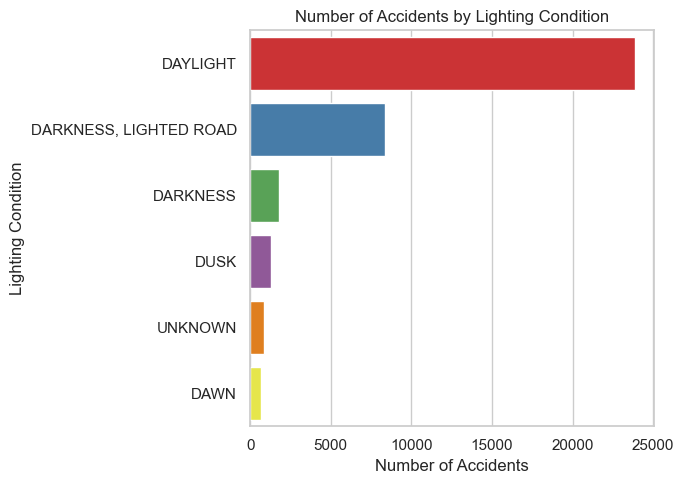

C:\Users\shahr\AppData\Local\Temp\ipykernel_2268\3172063717.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered.values, y=filtered.index, palette='Set1')


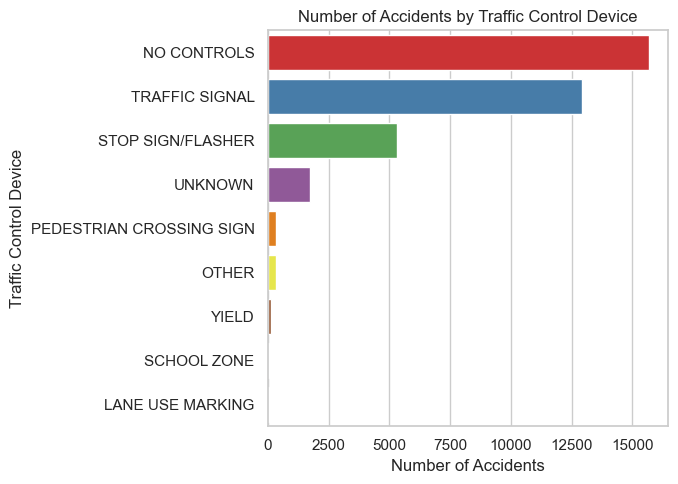

C:\Users\shahr\AppData\Local\Temp\ipykernel_2268\3172063717.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered.values, y=filtered.index, palette='Set1')


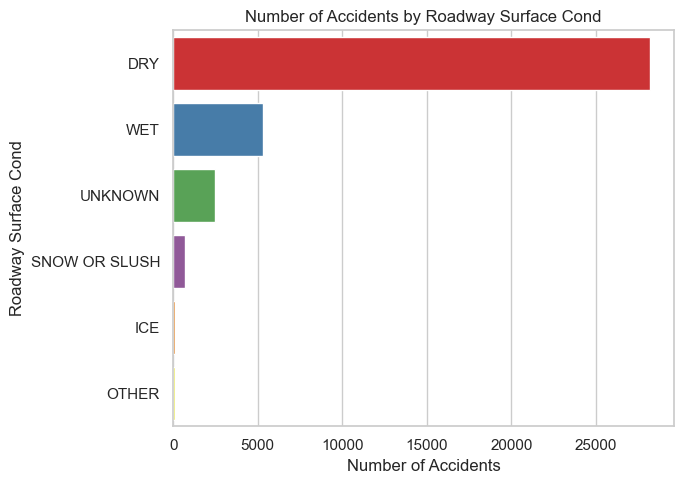

In [135]:
columns_to_plot = ['LIGHTING_CONDITION', 'TRAFFIC_CONTROL_DEVICE', 'ROADWAY_SURFACE_COND']

for col in columns_to_plot:
    value_counts = ped_df[col].value_counts()
    filtered = value_counts[value_counts > 50]
    
    if len(filtered) > 0:
        if len(filtered) > 10:
            filtered = filtered[:5]
        
        plt.figure(figsize=(7, 5))
        sns.barplot(x=filtered.values, y=filtered.index, palette='Set1')
        plt.xlabel('Number of Accidents')
        plt.ylabel(col.replace("_", " ").title())
        plt.title(f'Number of Accidents by {col.replace("_", " ").title()}')
        plt.tight_layout()
        plt.show()

In [127]:
ped_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

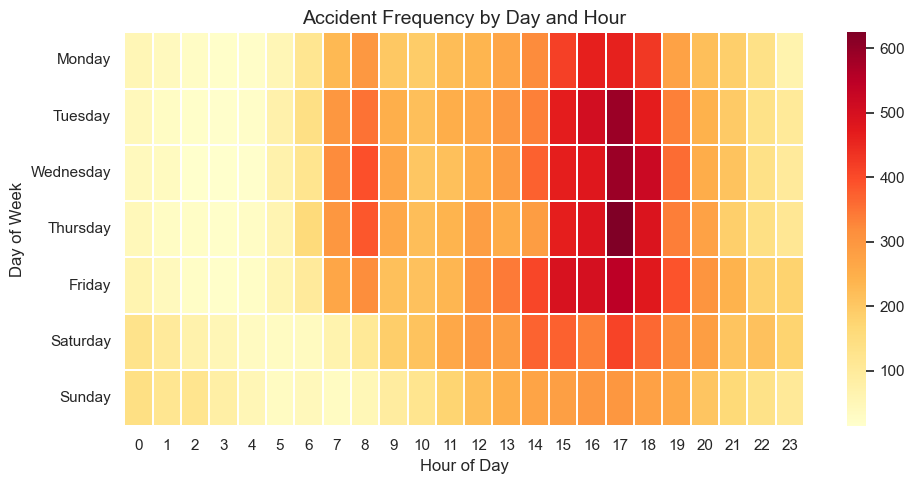

In [136]:
import seaborn as sns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Accidents by Hour of Day (heatmap by day vs hour)
heatmap_data = ped_df.groupby(['CRASH_DAY_NAME', 'CRASH_HOUR_FROM_DATE']).size().unstack(fill_value=0).reindex(index=day_order)
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.1)
plt.title("Accident Frequency by Day and Hour", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

C:\Users\shahr\AppData\Local\Temp\ipykernel_2268\1293557976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_controls.values, y=top_controls.index, palette='Set1')


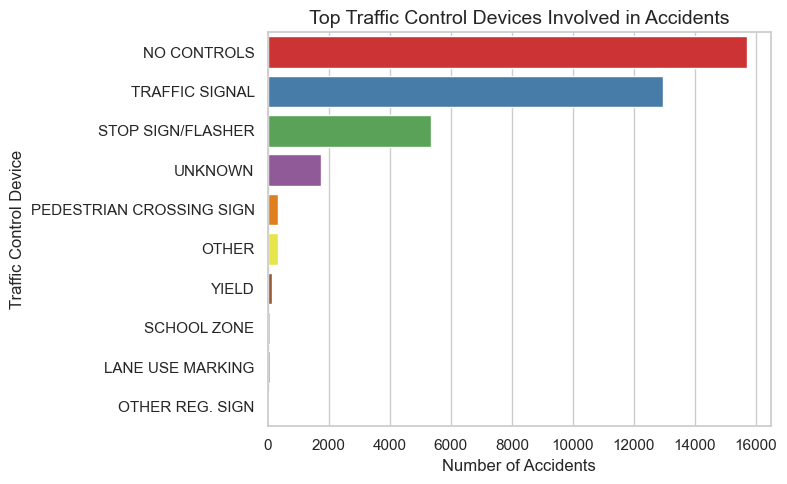

In [142]:
top_controls = ped_df['TRAFFIC_CONTROL_DEVICE'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_controls.values, y=top_controls.index, palette='Set1')
plt.title("Top Traffic Control Devices Involved in Accidents", fontsize=14)
plt.xlabel("Number of Accidents")
plt.ylabel("Traffic Control Device")
plt.tight_layout()
plt.show()

In [ ]:
df['VIOLATION DATE'] = pd.to_datetime(df['VIOLATION DATE'])

In [21]:
df['VIOLATION DATE'].dt.year

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
408256    2024
408257    2017
408258    2017
408259    2018
408260    2024
Name: VIOLATION DATE, Length: 408261, dtype: int32

## Visuals 

C:\Users\shahr\AppData\Local\Temp\ipykernel_2268\338607105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=injury_surface.values, y=injury_surface.index, palette='viridis')


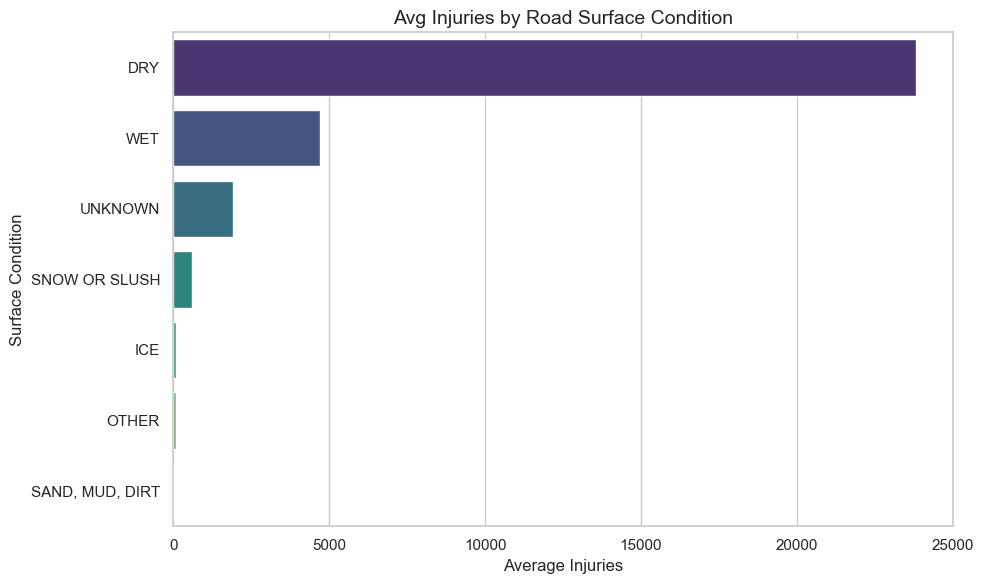

In [144]:
injury_surface = ped_df.groupby('ROADWAY_SURFACE_COND')['INJURIES_TOTAL'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=injury_surface.values, y=injury_surface.index, palette='viridis')
plt.title("Avg Injuries by Road Surface Condition", fontsize=14)
plt.xlabel("Average Injuries")
plt.ylabel("Surface Condition")
plt.tight_layout()
plt.show()

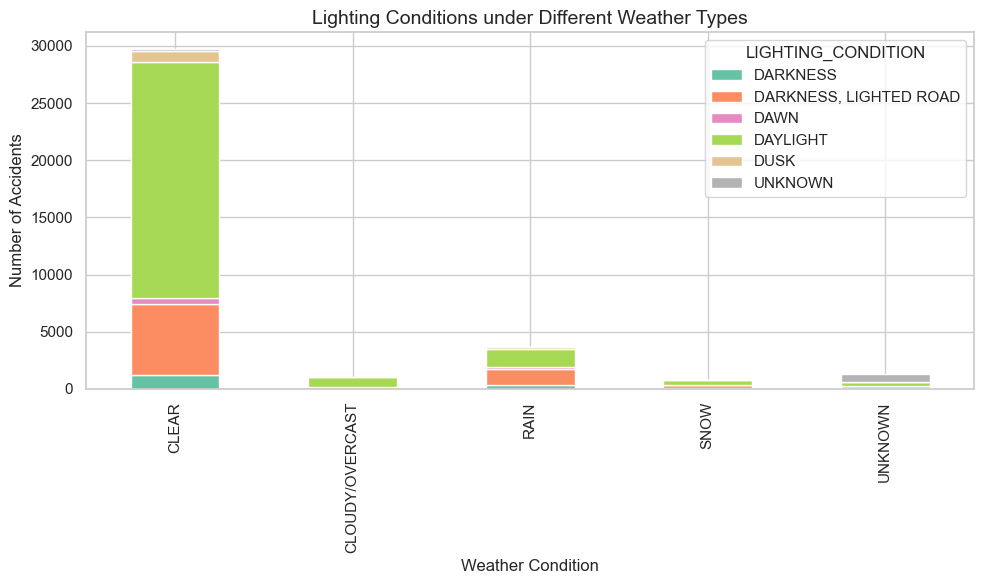

In [146]:
top_weather = ped_df['WEATHER_CONDITION'].value_counts().head(5).index
weather_lighting = ped_df[ped_df['WEATHER_CONDITION'].isin(top_weather)]
weather_lighting_ct = pd.crosstab(weather_lighting['WEATHER_CONDITION'], weather_lighting['LIGHTING_CONDITION'])

weather_lighting_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Lighting Conditions under Different Weather Types", fontsize=14)
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

## ML 

## Reflection